# [Release] 2023 PyTorch Study : Level 2 Chapter 1 - Example
*Copyright 2023. 이호준 all rights reserved.*

-----

「Level 2 Chapter 1 - 선형 회귀 (Linear Regression)」의 예제 코드입니다.

본 예제 코드의 목적은 선형 회귀를 통해 "**키를 보고 몸무게를 예측하는 인공지능**"을 만드는 것입니다.

## Import
필요한 라이브러리들을 Import합니다.

|라이브러리 이름|설명|
|---|---|
|Pandas|데이터프레임 조작 라이브러리|
|Numpy|텐서 연산 라이브러리|
|Matplotlib|데이터 시각화 라이브러리|
|copy|깊은/얕은 복사와 관련된 라이브러리|
|IPython|주피터 노트북에서 출력과 관련된 라이브러리|

*copy와 IPython은 당장 모르셔도 괜찮습니다.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import copy
from IPython import display

## Define Hyper Parameters
학습에 필요한 하이퍼 파라미터(상수)들을 선언합니다.

In [2]:
ALPHA = 0.00001

## Load Dataset
학습용 데이터를 불러오고 가장 앞 10개의 데이터만 출력해봅니다.

아래는 학습 데이터의 구조입니다.
(미국 데이터라 단위가 인치와 파운드인 것 같습니다.)

|컬럼명|설명|
|---|---|
|Height(Inches)|인치 단위로 나타낸 키|
|Weight(Pounds)|파운드 단위로 나타낸 몸무게|

In [3]:
data = pd.read_csv('Dataset/SOCR-HeightWeight.csv')

In [4]:
print(f"데이터 개수 : {len(data)}개")
data.head(10)

데이터 개수 : 25000개


,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


## Preprocess Dataset
학습용 데이터를 학습에 맞게 가공합니다.

In [5]:
matrix = np.array(data.values, 'float')
X = matrix[:,0]
Y = matrix[:,1]

## Visualize Dataset
학습용 데이터의 분포를 좌표평면 위에 올려봅니다.

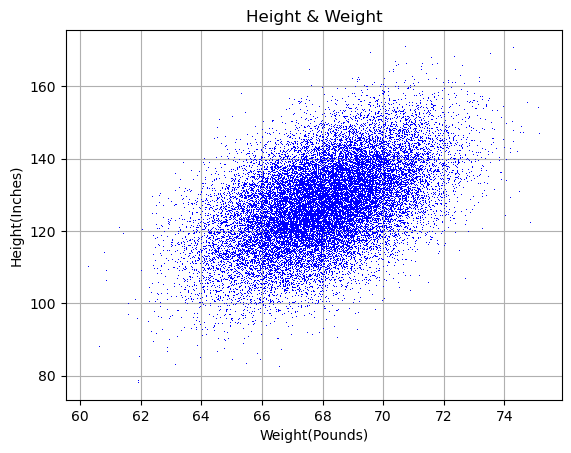

In [6]:
plt.plot(X, Y,'b,') # b는 blue, ,(comma)는 픽셀 마커
plt.ylabel('Height(Inches)')
plt.xlabel('Weight(Pounds)')
plt.title('Height & Weight')
plt.grid()
plt.show()

## Define Model & Cost Function

In [7]:
class Model():
    def __init__(self, init_w=0.0, init_b=0.0):
        self.w = init_w
        self.b = init_b
        
    def __call__(self, x):
        return self.w * x + self.b
    
    def __str__(self):
        if self.b < 0 :
            return f"f(x) = {round(self.w, 3)}x - {round(abs(self.b), 3)}"
        else :
            return f"f(x) = {round(self.w, 3)}x + {round(abs(self.b), 3)}"       
        

In [8]:
def compute_cost(model, x, y):
    return (model(x)-y)**2

## Define Parameter Update Function
Model을 함수로 나타내면 $f(x) = Wx+b$ 이므로,

손실 함수와 Model을 합쳐서 나타내면 $L_{x, y}(W, b) = (f(x)-y)^2 = (Wx+b-y)^2$이다.

이를 경사하강법 수식에 넣으면, $W_{new} = W_{old} - \alpha \nabla L_{x,y}(W, b)$으로 표현할 수 있다.



이때, $\nabla L_(W, b)$는 $(\frac{\partial L}{\partial W}, \frac{\partial L}{\partial b})$이다.
(더 자세한 정보는 **델 연산자**를 찾아보자.)

이 각각의 편미분 값을 계산하면

$$\frac{\partial L}{\partial W} = 2x(Wx+b-y) = 2x(L_{x, y}(W, b)-y)$$

$$\frac{\partial L}{\partial b} = 2(Wx+b-y) = 2(L_{x, y}(W, b)-y)$$
이다. (더 자세한 정보는 **편미분**을 찾아보자.)

In [9]:
def parameter_update(model, x, y, alpha = ALPHA):
    cost = compute_cost(model, x, y)
    
    model.w = model.w - alpha * (2*x*(model(x)-y))
    model.b = model.b - alpha * (2*(model(x)-y))
    
    return model

## Train

In [10]:
model = Model()

In [11]:
model_history = []

def train(model, X, Y):
    for ind, (x, y) in enumerate(zip(X, Y)):
        model = parameter_update(model, x, y)
        model_history.append(copy.deepcopy(model))

In [12]:
train(model, X, Y)
print(f"학습 완료 [최종 모델 : {str(model)}]")

학습 완료 [최종 모델 : f(x) = 1.849x - 0.011]


## Monitoring
---
아래 내용은 경사하강법과 그 결과를 조금 더 직관적으로 이해할 수 있게 학습 과정을 시각화하여 영상으로 연결한 것이므로 코드 자체의 내용은 굳이 이해하실 필요는 없습니다.

In [13]:
def plt_image_animation(frames, update_func):
    fig, ax = plt.subplots(figsize=(6,6))
    plt.grid()    
    
    anim = animation.FuncAnimation(fig, update_func, frames=frames)    
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    plt.close()

In [14]:
line = None
def update_animation(t):
    global line
    if line != None:
        line.pop(0).remove()
        
    old_model = model_history[t]
    x = np.array(range(int(np.min(X))-1, int(np.max(X))+1))
    line = plt.plot(x, old_model(x), label=str(old_model), color="red")
    
    plt.title(f'Height & Weight ({t} iter)')
    plt.plot(X, Y,'b,') 
    plt.ylabel('Height(Inches)')
    plt.xlabel('Weight(Pounds)')
    plt.legend()

In [15]:
plt_image_animation(100, update_animation)

## Real Test

In [16]:
height = 172 #cm 단위로

weight = model(0.393701*height)*0.453592 # 두 상수는 단위 변환에서 사용되는 상수
print(f"당신의 몸무게는 {weight}kg 입니까?")

당신의 몸무게는 56.8009958713273kg 입니까?
